In [0]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [0]:
from google.colab import files
uploads= files.upload()

In [0]:
data=pd.read_csv('train_data.csv',na_filter=True,header=0)

In [0]:
#data.head()
#data.info
#data.info()
#data.describe()

In [0]:
oldata = data.drop(columns=['Id','SalePrice'],axis=1)
allfeat=oldata.columns
allfeat
allfeatlist=list(allfeat)
len(allfeatlist)

In [47]:
target=['SalePrice']

categorical_data= data.select_dtypes(include=['object']).copy()
column_names =list(categorical_data.columns)
#column_names

nominal=['MSZoning','LandContour','LotConfig','Neighborhood','RoofStyle','Functional','SaleType']
ordinal=list(set(column_names)-set(nominal))
numerical= list(set(allfeatlist)-set(column_names))

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')

for feature in ordinal:
  categorical_data[feature] = categorical_data[feature].cat.codes

#categorical_data.head()
#categorical_data.info()
#categorical_data.describe()

,Street,Alley,LotShape,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.995890,-0.909589,1.942466,0.000685,0.062329,2.031507,2.008219,0.493151,3.038356,1.075342,9.624658,10.339726,1.745890,2.539726,3.733562,1.396575,2.178767,2.715753,2.180137,2.637671,4.559589,1.036301,1.538356,0.934932,3.678767,2.339726,0.969178,2.097260,1.062329,3.594521,3.628082,1.856164,-0.989726,-0.532877,-0.892466,3.770548
std,0.063996,0.372151,1.409156,0.026171,0.276232,0.868515,0.259040,1.198277,1.911305,0.599127,3.197659,3.540570,0.646987,0.693995,0.731807,0.722394,0.998402,0.884346,1.246138,1.895727,1.296332,0.295124,1.739524,0.246731,1.058385,0.830161,2.037956,1.890815,0.934939,1.262078,1.231595,0.496592,0.158916,1.029191,0.555437,1.100854
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000,8.000000,8.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000,4.000000,2.000000,-1.000000,1.000000,0.000000,4.000000,4.000000,2.000000,-1.000000,-1.000000,-1.000000,4.000000
50%,1.000000,-1.000000,3.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,1.000000,12.000000,13.000000,2.000000,3.000000,4.000000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,1.000000,0.000000,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,-1.000000,-1.000000,-1.000000,4.000000
75%,1.000000,-1.000000,3.000000,0.000000,0.000000,2.000000,2.000000,0.000000,5.000000,1.000000,12.000000,13.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,5.000000,5.000000,1.000000,4.000000,1.000000,4.000000,3.000000,2.000000,5.000000,2.000000,4.000000,4.000000,2.000000,-1.000000,-1.000000,-1.000000,4.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,8.000000,7.000000,4.000000,7.000000,7.000000,14.000000,15.000000,3.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,4.000000,1.000000,4.000000,3.000000,4.000000,5.000000,2.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,5.000000


In [0]:
data_copy = categorical_data.copy()
data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy], axis=1)
data_copy.drop(nominal,axis=1,inplace= True)

new_data = pd.concat([data_copy,data[numerical],data[target]],axis=1)
#new_data

In [0]:
all_features = list(new_data.columns)
X = new_data.loc[:,all_features].values
y = new_data.loc[:,["SalePrice"]].values

In [0]:
X = StandardScaler().fit_transform(X)
np.nan_to_num(X)
X

In [0]:
pca = PCA(n_components=2)
#pca = PCA(0.9) #In the question
pc_s = pca.fit_transform(np.nan_to_num(X))
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
final_data = pd.concat([pca_data,data[target]],axis=1)
#final_data
#final_data.info()
#final_data.describe()

In [0]:
#pca.explained_variance_
pca.explained_variance_ratio_

Text(0.5, 0, 'House Price')

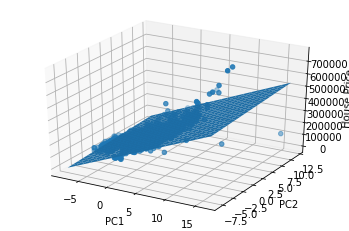

In [55]:

from sklearn.linear_model import LassoCV

regressor=LassoCV()
fd_array= final_data.to_numpy()
finaltr= np.c_[fd_array[:,0],fd_array[:,1]]
regressor.fit(finaltr,fd_array[:,2])
w1 = regressor.coef_[0]
w2= regressor.coef_[1]
b=regressor.intercept_
Z =w1*X + w2*Y + b #last qn I think

minvalue = np.min(fd_array,axis=0)
maxvalue = np.max(fd_array,axis=0)
X,Y = np.meshgrid(np.linspace(minvalue[0],maxvalue[0],20),np.linspace(minvalue[1],maxvalue[1],20))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = fig1.gca(projection= '3d')
ax.scatter(fd_array[:,0],fd_array[:,1],fd_array[:,2])
ax.plot_surface(X,Y,Z)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price')
